# IMPORTS

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD, Adamax
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import keras_utils
%matplotlib inline

Using TensorFlow backend.


# DATASET

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True, reshape=False)

train_dataset = mnist.train.images
train_labels = mnist.train.labels
validation_dataset = mnist.validation.images
validation_labels = mnist.validation.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels

print()
print('## TRAIN')
print('train_labels', train_labels.shape)
print('train_dataset', train_dataset.shape)
print('## VALIDATION')
print('validation_labels', validation_labels.shape)
print('validation_dataset', validation_dataset.shape)
print('## TEST')
print('test_labels', test_labels.shape)
print('test_dataset', test_dataset.shape, '\n')

train_dataset = np.pad(train_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
validation_dataset = np.pad(validation_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
test_dataset = np.pad(test_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

print('## AFTER PADDING')
print('train_dataset', train_dataset.shape)
print('validation_dataset', validation_dataset.shape)
print('test_dataset', test_dataset.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

## TRAIN
train_labels (55000, 10)
train_dataset (55000, 28, 28, 1)
## VALIDATION
validation_labels (5000, 10)
validation_dataset (5000, 28, 28, 1)
## TEST
test_labels (10000, 10)
test_dataset (10000, 28, 28, 1) 

## AFTER PADDING
train_dataset (55000, 32, 32, 1)
validation_dataset (5000, 32, 32, 1)
test_dataset (10000, 32, 32, 1)


# MODEL

In [4]:
%%html
<img src='imgs/lenet5.png'>

In [7]:
model = Sequential()

# CONV 1
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=train_dataset.shape[1:], kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV 2
model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV 3
model.add(Conv2D(120, (5, 5), activation='relu', kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))
model.add(Flatten())

# DENSE 1
model.add(Dense(120, activation='relu', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))
model.add(Dropout(0.5))

# DENSE 2
model.add(Dense(84, activation='relu', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))
model.add(Dropout(0.5))

# OUTPUT
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))

sgd = SGD(lr=0.03, momentum=0.1, decay=0.00005, nesterov=True)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# LOADING MODEL

In [32]:
# checkpoint_file = 'keras_mnist_best_checkpoint.hdf5'
checkpoint_file = 'K_mnist_checkpoint_99_04.hdf5'
model.load_weights(checkpoint_file)

# TRAINING MODEL

In [12]:
checkpoint_format = 'keras_mnist_ep_{epoch:03d}_v-acc_{acc:.3f}_v-loss_{loss:.3f}.hdf5'

callbacks = [
            # EarlyStopping(monitor='val_loss', patience=4,
            #               mode='min', min_delta=0.001, verbose=1),
            # EarlyStopping(monitor='val_acc', patience=4,
            #               mode='max', min_delta=0.001, verbose=1),
            ModelCheckpoint(checkpoint_format, monitor='val_acc', verbose=0,
                            save_best_only=True, save_weights_only=True,
                            mode='auto', period=1),
        ]

history = model.fit(x=train_dataset, y=train_labels, batch_size=32, epochs=100,
                    verbose=2, callbacks=callbacks,
                    validation_data=(validation_dataset, validation_labels),
                    shuffle=True, # validation_split=0.2,
                    # steps_per_epoch=len(train_labels)//batch_size,
                    # validation_steps=len(validation_labels)//batch_size
                   )

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
 - 22s - loss: 0.6418 - acc: 0.8002 - val_loss: 0.1345 - val_acc: 0.9630
Epoch 2/100
 - 10s - loss: 0.2080 - acc: 0.9452 - val_loss: 0.1030 - val_acc: 0.9712
Epoch 3/100
 - 10s - loss: 0.1483 - acc: 0.9608 - val_loss: 0.0893 - val_acc: 0.9804
Epoch 4/100
 - 10s - loss: 0.1191 - acc: 0.9692 - val_loss: 0.0675 - val_acc: 0.9820
Epoch 5/100
 - 10s - loss: 0.0972 - acc: 0.9756 - val_loss: 0.0720 - val_acc: 0.9836
Epoch 6/100
 - 10s - loss: 0.0892 - acc: 0.9777 - val_loss: 0.0638 - val_acc: 0.9854
Epoch 7/100
 - 10s - loss: 0.0761 - acc: 0.9812 - val_loss: 0.0644 - val_acc: 0.9864
Epoch 8/100
 - 10s - loss: 0.0660 - acc: 0.9834 - val_loss: 0.0595 - val_acc: 0.9878
Epoch 9/100
 - 10s - loss: 0.0613 - acc: 0.9849 - val_loss: 0.0560 - val_acc: 0.9876
Epoch 10/100
 - 10s - loss: 0.0549 - acc: 0.9856 - val_loss: 0.0536 - val_acc: 0.9888
Epoch 11/100
 - 10s - loss: 0.0494 - acc: 0.9871 - val_loss: 0.0519 - val_acc: 0.9896
Epoch 12/100
 

Epoch 96/100
 - 10s - loss: 0.0068 - acc: 0.9983 - val_loss: 0.0665 - val_acc: 0.9916
Epoch 97/100
 - 10s - loss: 0.0063 - acc: 0.9984 - val_loss: 0.0630 - val_acc: 0.9916
Epoch 98/100
 - 10s - loss: 0.0055 - acc: 0.9985 - val_loss: 0.0684 - val_acc: 0.9918
Epoch 99/100
 - 10s - loss: 0.0065 - acc: 0.9984 - val_loss: 0.0697 - val_acc: 0.9916
Epoch 100/100
 - 11s - loss: 0.0066 - acc: 0.9983 - val_loss: 0.0694 - val_acc: 0.9918


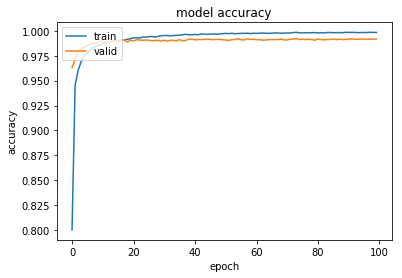

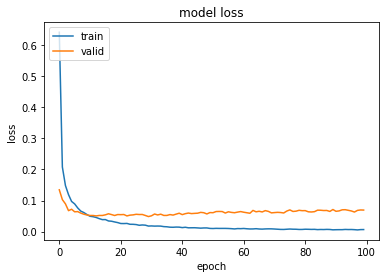

In [18]:
keras_utils.plot_history(history)

# TESTING MODEL

## LABELS
Shape of test labels:			 (10000, 10)
Shape of test labels argmax (index):	 (10000,)

## PREDICTIONS
Shape of predictions:			 (10000, 10)
Shape of predictions argmax (index):	 (10000,)

## FIRST SAMPLE
One-hot encoding: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
One-hot encoding argmax (index): 7

## CONFIDENCES OF FIRST PREDICTION
Confidences:
	 8.5230775e-13
	8.648738e-15
	1.1355809e-14
	2.7743902e-16
	7.2317476e-16
	5.3416376e-17
	2.4409056e-21
	1.0
	1.9898653e-18
	3.9586754e-12
Argmax: 7


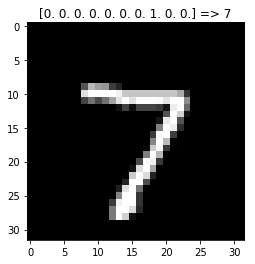

In [30]:
labels_max = test_labels.argmax(axis=-1)
print('## LABELS')
print('Shape of test labels:\t\t\t', test_labels.shape)
print('Shape of test labels argmax (index):\t', labels_max.shape)

predictions = model.predict_on_batch(test_dataset)
predictions_max = predictions.argmax(axis=-1)
print('\n## PREDICTIONS')
print('Shape of predictions:\t\t\t', predictions.shape)
print('Shape of predictions argmax (index):\t', predictions_max.shape)

print('\n## FIRST SAMPLE')
print('One-hot encoding:', test_labels[0])
print('One-hot encoding argmax (index):', labels_max[0])

plt.imshow(np.squeeze(test_dataset[0]), cmap=plt.get_cmap('gray'))
plt.title(f'{test_labels[0]} => {np.argmax(test_labels[0])}')

print('\n## CONFIDENCES OF FIRST PREDICTION')
print('Confidences:\n\t', '\n\t'.join([str(x) for x in predictions[0]]))
print('Argmax:', predictions_max[0])

Total: 10000
Erros: 116	Acurácia: 98.84%
Confusion matrix, without normalization


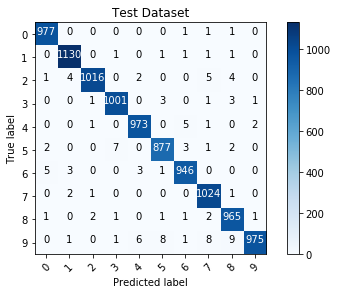

In [31]:
total = labels_max.shape[0]
errors = np.sum(labels_max != predictions_max)
print(f'Total: {total}')
print(f'Erros: {errors}\tAcurácia: {100.0 - (errors*100/total)}%')

cm = confusion_matrix(labels_max, predictions_max)
keras_utils.plot_confusion_matrix(cm, classes=[str(x) for x in range(10)],
                          normalize=False,
                          title='Test Dataset',
                          cmap=plt.cm.Blues)

In [11]:
f1_score(np.argmax(test_labels,axis=1), predictions.argmax(axis=1), average='micro')

0.9904

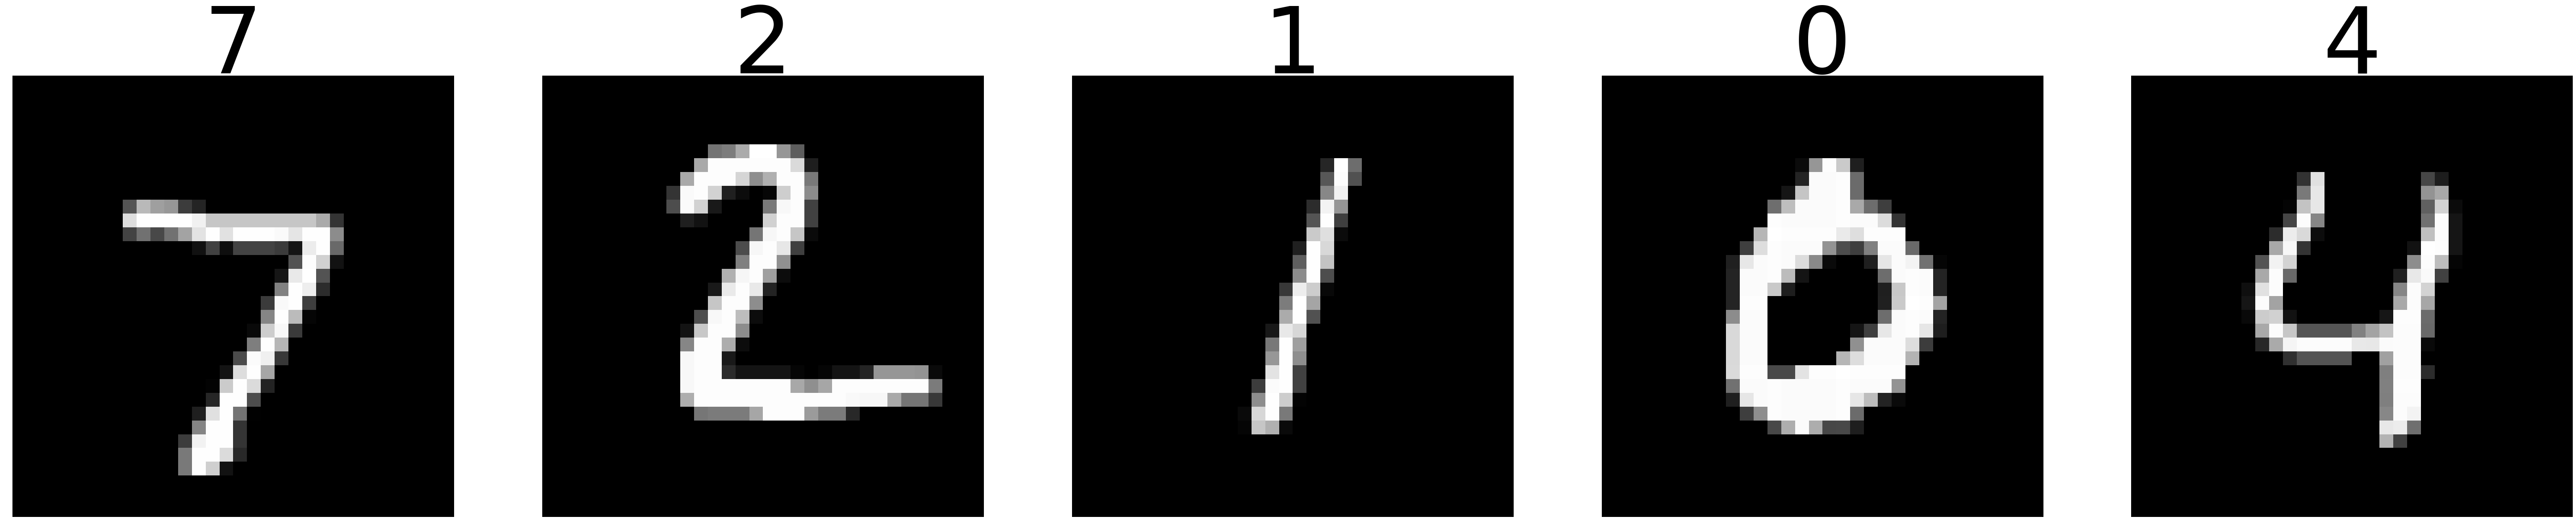

In [20]:
mi, ma = 0, 5
title_plots(test_dataset[mi:ma], titles=[str(i) for i in range(10)], titles_idx=keras_utils.confidence_to_one_hot(predictions[mi:ma]))